In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('movies.csv') #Provide Actual path if code not work  

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Removing null value from 'budget' ,'gross' columns
#Change Data Type of 'budget' ,'gross' columns

Index = df[df['budget'].isna()].index
dfm = df.drop(Index)
dfm['budget'] = dfm['budget'].astype('int64')
dfm
#dfm.info()
#Change Data Type of Columns
Index1 = dfm[dfm['gross'].isna()].index
dfm1 = dfm.drop(Index1)
dfm1['gross'] = dfm1['gross'].astype('int64')
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   int64  
 12  gross     5436 non-null   int64  
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 679.5+ KB


In [6]:
df_modified = dfm1.copy()


In [7]:
#df[['Date','Last']] = df.Name.str.split("_",expand=True)
df_modified['Correct_year'] = df_modified['released'].str.split(expand=True)[2]

In [8]:
df_modified

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [9]:
#sorting data by gross income colume  
df_modified.sort_values(by=['gross'] , inplace=False ,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


Text(0.5, 1.0, 'Budget vs Gross')

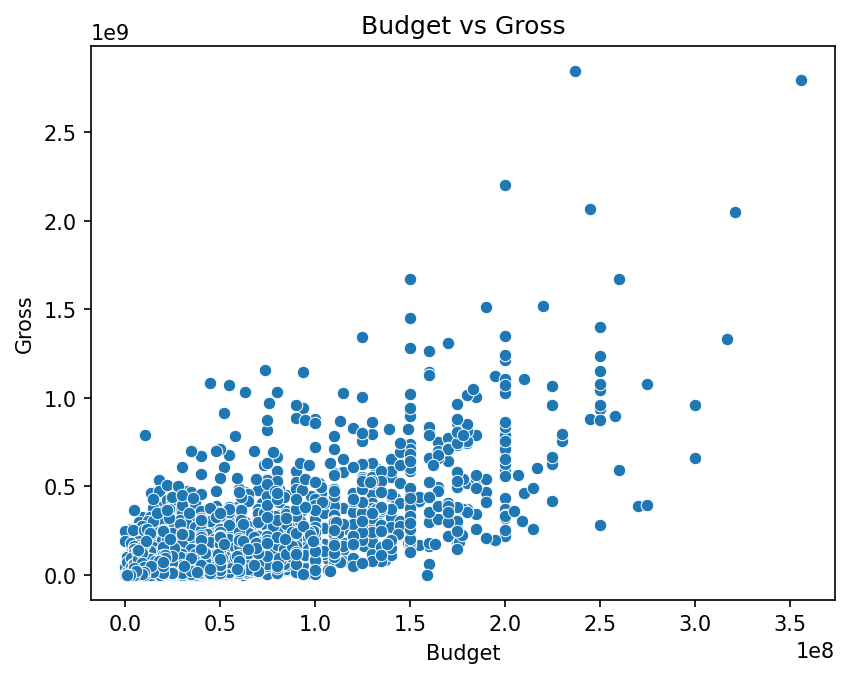

In [10]:
#
plt.figure(dpi=150  )
sns.scatterplot(x=df_modified['budget'] , y=df_modified['gross'] )
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.title('Budget vs Gross')


<AxesSubplot:xlabel='budget', ylabel='gross'>

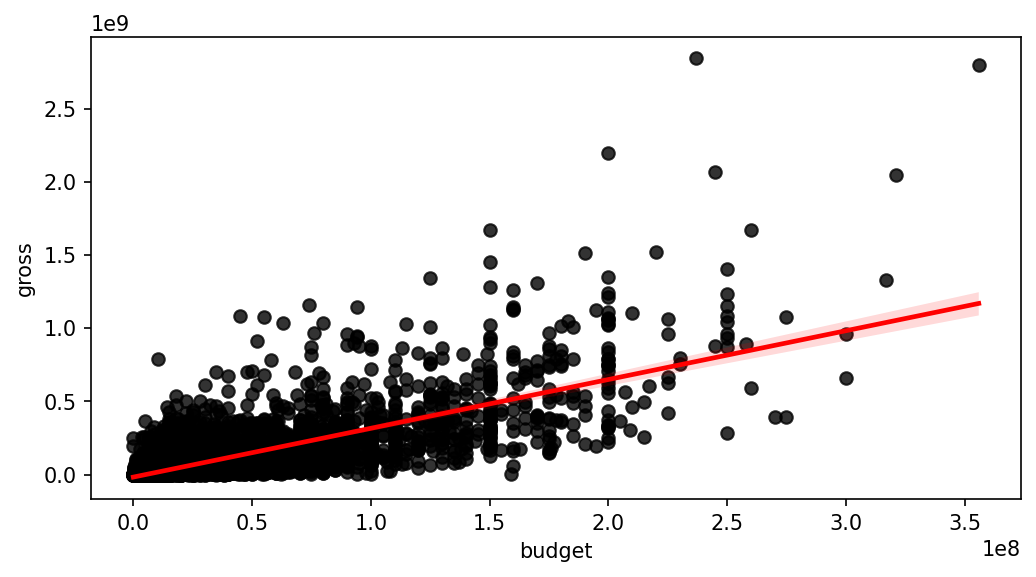

In [14]:
plt.figure(figsize=(8,4) ,dpi = 150)
sns.regplot(x='budget' , y ='gross', data=df_modified, 
            scatter_kws={'color':'black'} , line_kws={'color':'red'})

In [21]:
#let's start looking at correlation
#pearson, #kendall , #spearmen
#By default , python applies pearson correlation
df_modified.corr()
#df_modified.corr(method = 'kendall')
#df_modified.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


Text(0.5, 1.0, 'Correlation_Matrix')

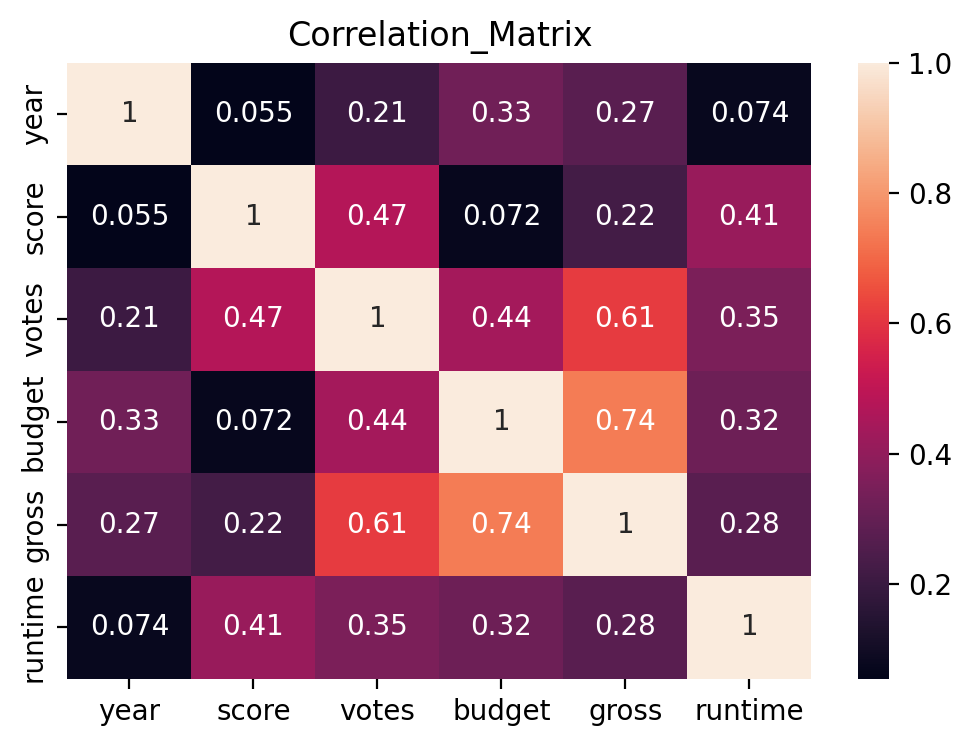

In [28]:
#High correlation is found between budget and gross
correlation_matrix = df_modified.corr()
plt.figure(figsize=(6,4) , dpi=200)
sns.heatmap(correlation_matrix , annot= True)
#plt.ylabel('Movie_features')
#plt.xlabel('Movie_features')
plt.title('Correlation_Matrix')


In [37]:
df_numerized = df_modified

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_year
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0,2
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0,2
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0,2
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0,2
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0,42
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0,42
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0,42
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0,42


Text(0.5, 1.0, 'Correlation_Matrix')

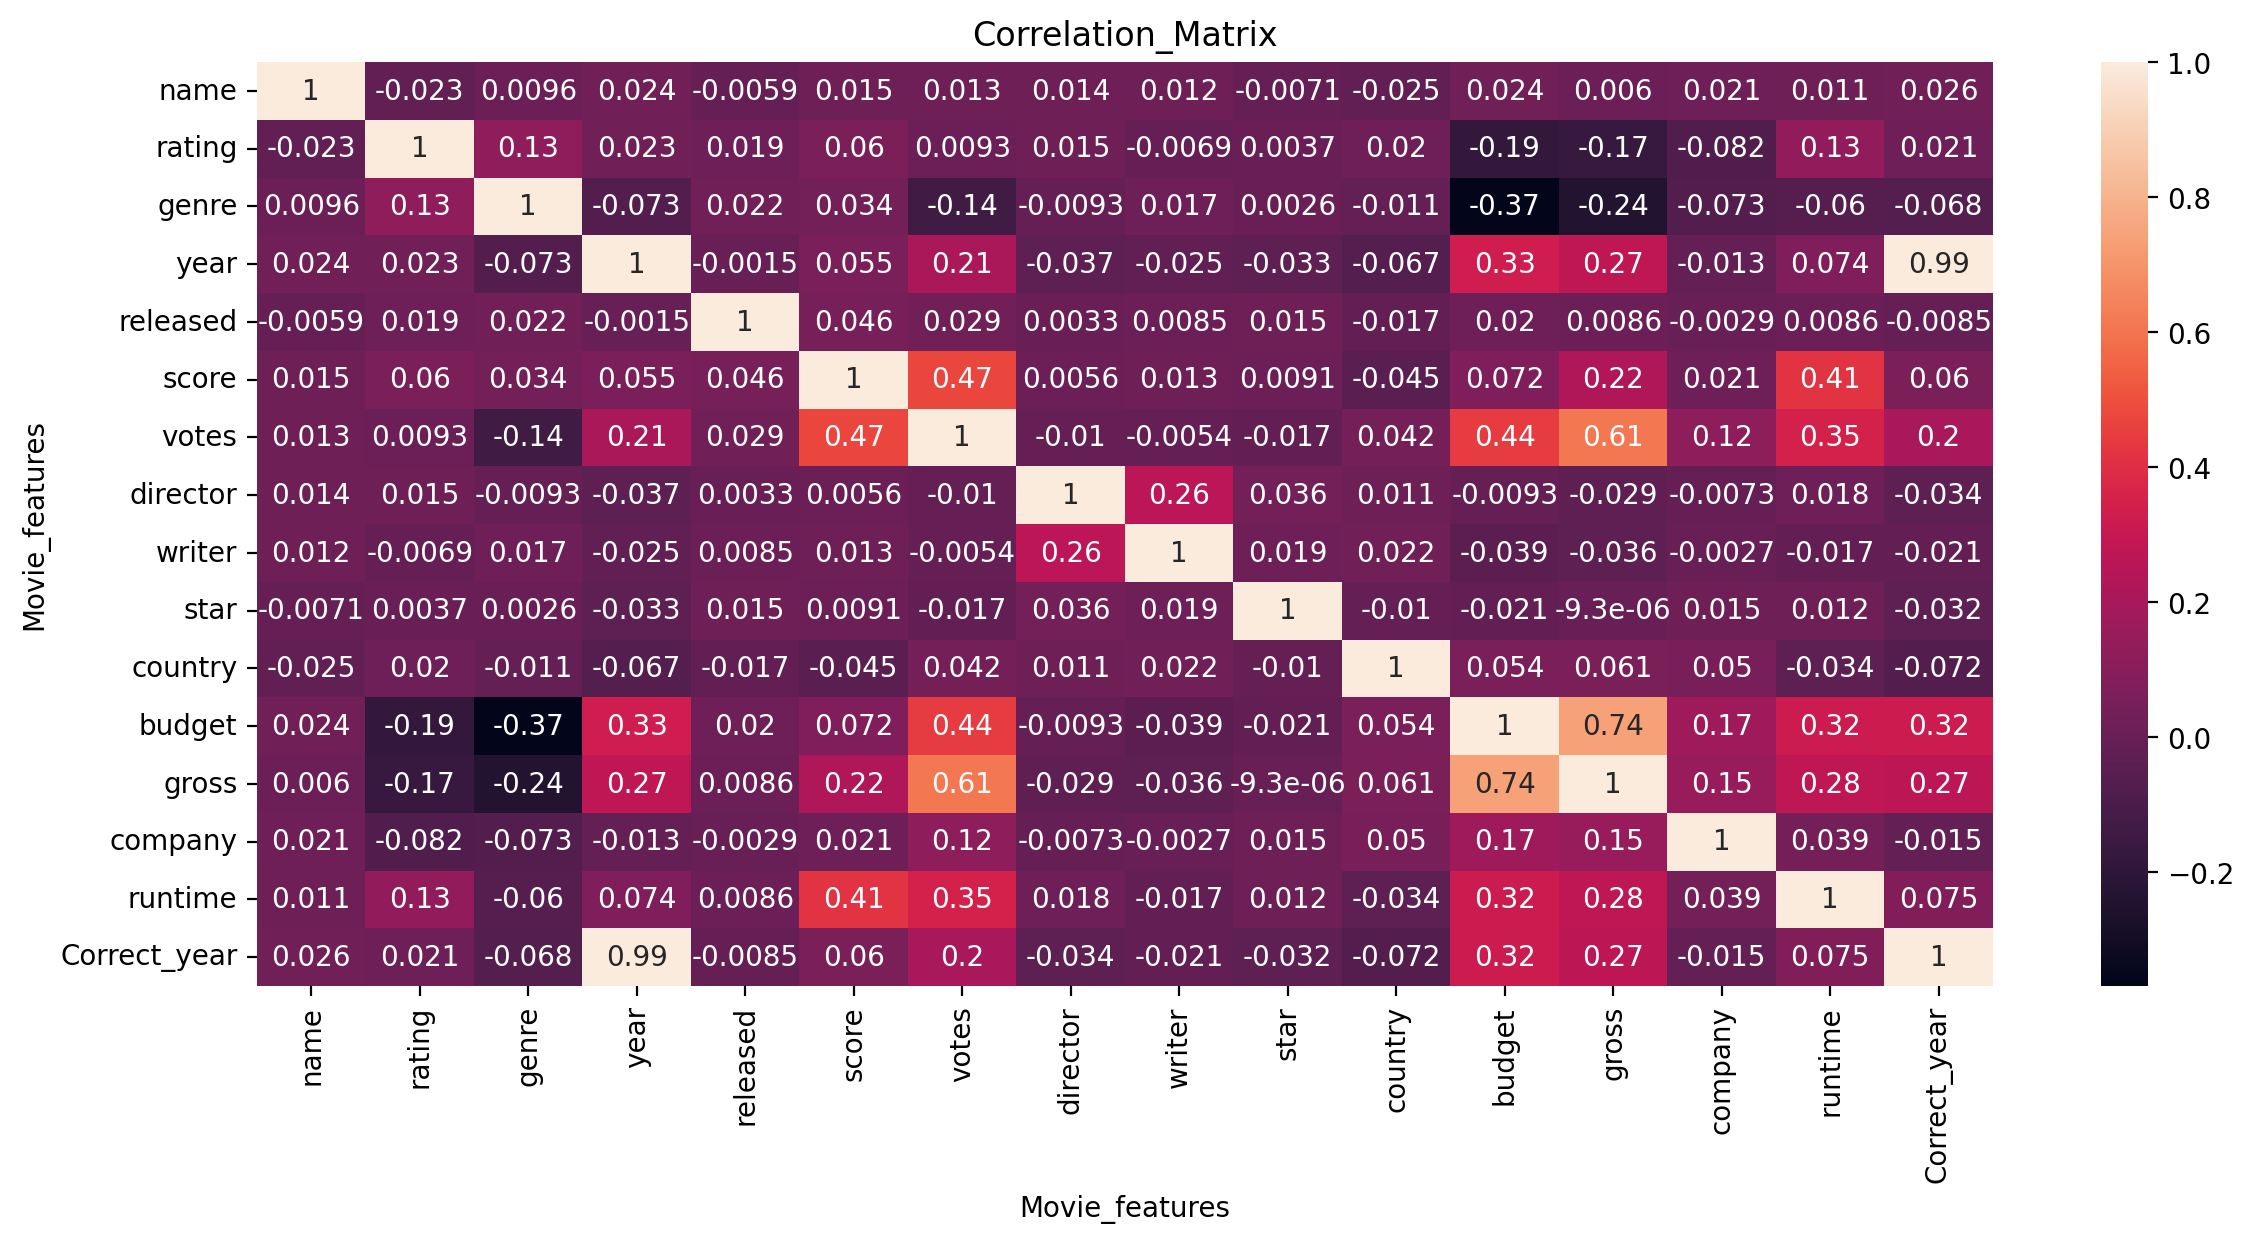

In [52]:
correlation_matrix = df_numerized.corr()
plt.figure(figsize=(14,6) , dpi=200)
sns.heatmap(correlation_matrix , annot= True )
plt.ylabel('Movie_features')
plt.xlabel('Movie_features')
plt.title('Correlation_Matrix')


In [44]:
correlation_mat =df_numerized.corr()
correlation_pair = correlation_mat.unstack()
correlation_pair

name          name            1.000000
              rating         -0.023013
              genre           0.009617
              year            0.024435
              released       -0.005896
                                ...   
Correct_year  budget          0.320147
              gross           0.268273
              company        -0.015181
              runtime         0.075342
              Correct_year    1.000000
Length: 256, dtype: float64

In [53]:
#votes and budget shows maximum correlation 
#company has no significant correlation with gross income
sorted_pair = correlation_pair.sort_values()
High_correlation = sorted_pair[(sorted_pair)>0.6]
High_correlation

votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
Correct_year  year            0.994746
year          Correct_year    0.994746
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Correct_year  Correct_year    1.000000
dtype: float64